Importa o modelo a ser fatiado e mapeado

In [2]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/Downloads/Tangran3/TangranV2/input/stl_models/chavinha70.stl
Second arg: 300.0
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/input/sliced
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -20.832, model zmax = 20, first plane Z = -22.828, number of planes = 23
-Incremental, chavinha70.stl, thickness = 2, #T = 312, #P = 21, #S = 1540, 0.00024s (slicing), 0.002019s (polygon assembling), 0.011059s (total), *K: 4.9359


rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing image: ../input/sliced/layer_012.pgm


writing image: ../input/sliced/layer_013.pgm


writing image: ../input/sliced/layer_014.pgm


writing image: ../input/sliced/layer_015.pgm


writing image: ../input/sliced/layer_016.pgm


writing image: ../input/sliced/layer_017.pgm


writing image: ../input/sliced/layer_018.pgm


writing image: ../input/sliced/layer_019.pgm


writing image: ../input/sliced/layer_020.pgm


writing out

Paredes Finas

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 4.447110414505005
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0009076595306396484
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.036901235580444336
Total de [Fase 1: Camada: 0] : 4.497531175613403
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 4.705279111862183
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.00045037269592285156
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.02483510971069336
Total de [Fase 1: Camada: 1] : 4.743846893310547
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 4.374165773391724
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0007808208465576172
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.03282737731933594
Total de [Fase 1: Camada: 2] : 4.420440

Contornos

In [4]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 5
Total de [Criando Lvls] : 2.488215208053589
Criando os loops
Total de [Criando os loops] : 1.201857089996338
Criando regiões de influência
Total de [Criando regiões de influência] : 0.17226219177246094
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 1.55820631980896
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:620 maior void:0.32852386237513875Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 0, 3] Perdendo total:73109 maior void:78.74472807991121Bw -> bloqueado
['Lvl_002', 0, 0] Perdendo total:11874 maior void:5.847946725860155Bw -> bloqueado
['Lvl_003', 0, 0] Perdendo total:11288 maior void:5.700332963374029Bw -> bloqueado
['Lvl_004', 0, 0] Perdendo total:5395 maior void:2.591564927857936Bw -> bloqueado
['Lvl_001', 0, 0] Perdendo total:15538 maior void:8.847946725860155Bw -> bloqueado
['Lvl

Pontes

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(n_max, nozzle_diam_internal, folders, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 3.6016979217529297
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 12.120050430297852
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Elemento: ('Reg_000', 'Reg_002') Maior prioridade: 1
Total de [Criando pontes de Crossover] : 0.15961527824401855
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.018651485443115234
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.0009591579437255859
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.2519567012786865
Total de [Fase 3: Camada: 0] : 16.211209058761597
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 2.405668258666992
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 13.474619626998901
Criando pontes de Crossover
Elemento: ('Reg_000', '

Zigzags

In [6]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.834155797958374
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.021778345108032227
Total de [Fase 4: Camada: 0] : 1.003957748413086
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 4.195048809051514
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.021352052688598633
Total de [Fase 4: Camada: 1] : 4.347478628158569
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.7748417854309082
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.02210712432861328
Total de [Fase 4: Camada: 2] : 0.9235634803771973
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 4.152180433273315
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.0273745059967041
Total de [Fase 4: Camada: 3] : 4.30033016204834
Fa

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.40250515937805176
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.22585344314575195
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.21870756149291992
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.2184610366821289
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.22623682022094727
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.23119068145751953
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.21143531799316406
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.21461105346679688
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.2340846061706543
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.21944475173950195


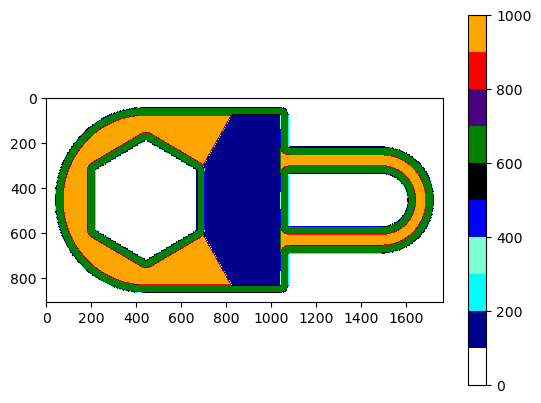

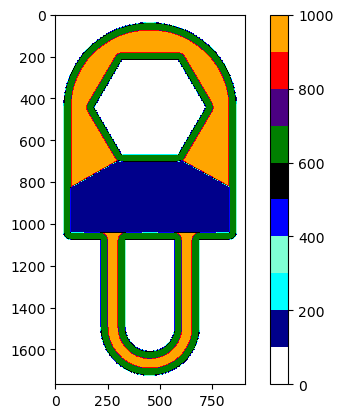

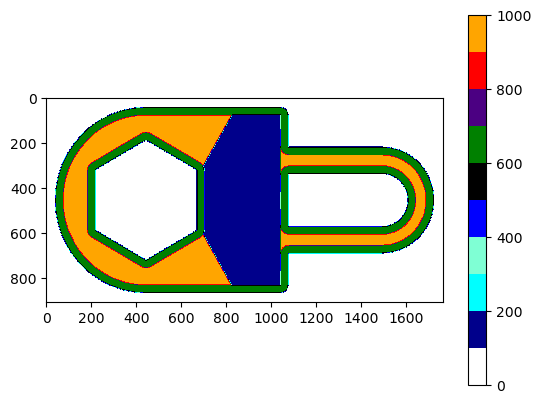

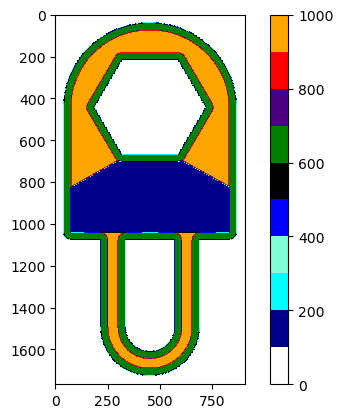

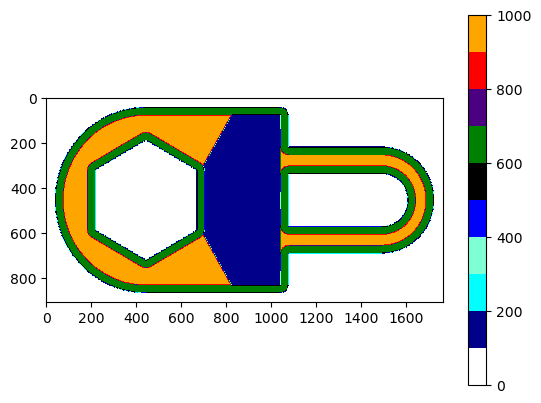

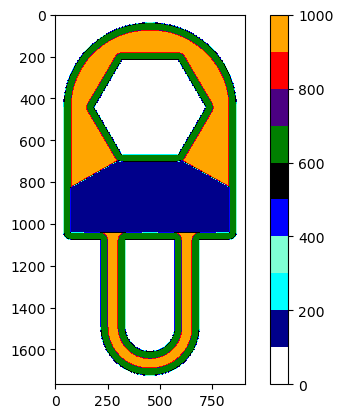

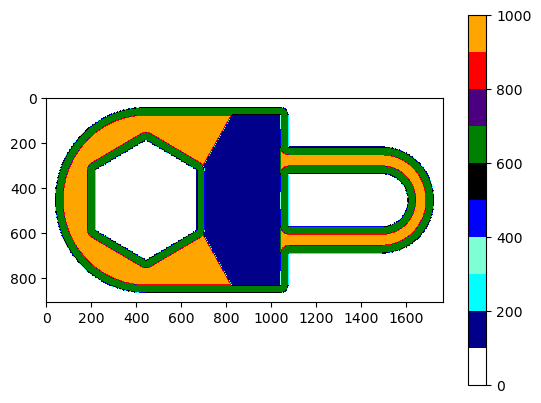

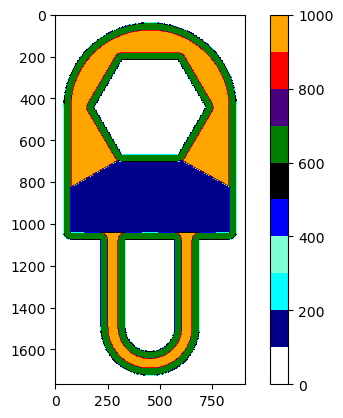

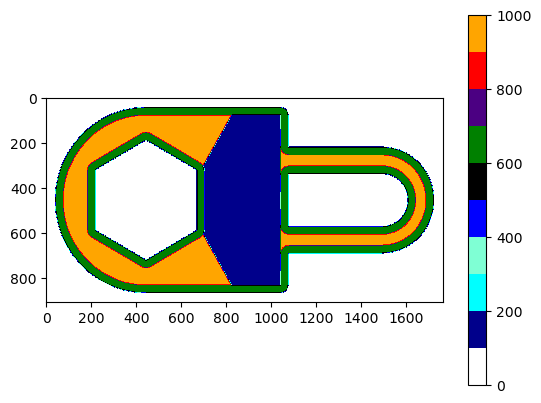

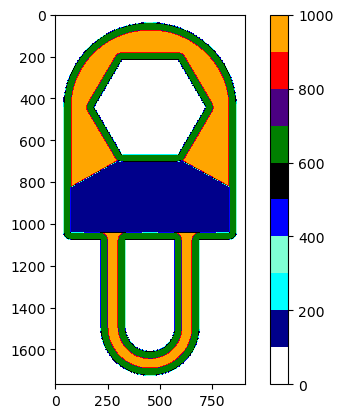

In [7]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        # if i%2 == 1:
        #     img_mapping = it.rotate_img_ccw(img_mapping )
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        # plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.1067192554473877
Total de [Making offset routes] : 3.7727415561676025
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.11231350898742676
Total de [Making offset routes] : 3.811652660369873
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.09617996215820312
Total de [Making offset routes] : 3.75706148147583
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.10323619842529297
Total de [Making offset routes] : 3.9727773666381836
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12724065780639648
Total de [Making offset routes] : 4.20716118812561
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12406682968139648
Total de [Making offset routes] : 4.262058973312378
Making offset routes
salvando imagens das

Rotas de pontes

In [6]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.23755812644958496
Total de [Making bridges routes] : 32.47124791145325
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.25355052947998047
Total de [Making bridges routes] : 31.465791702270508
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.2617981433868408
Total de [Making bridges routes] : 31.699097871780396
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.2096095085144043
Total de [Making bridges routes] : 29.043965578079224
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.19493722915649414
Total de [Making bridges routes] : 25.99823498725891
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.21237707138061523
Total de [Making bridges routes] : 25.044471740722656
Making bridges routes
salv

Rotas de Ziguezague

In [1]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 11.55631160736084
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.442568302154541
Total de [criando as rotas de zigzag, camada:L_000] : 13.300708532333374
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.052980661392211914
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.004426002502441406
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0023026466369628906
salvando grafos
Total de [salvando grafos] : 0.11219358444213867
Total de [Making zigzag routes] : 13.717735767364502
Making zigzag routes
criando as rotas de zigzag, camada:L_001
fazendo as tres opções:
Total de [fazendo as tres opções:] : 11.364187479019165
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.6219570636749268
Total de [criando as rotas de zigzag, camada:L_001] : 13.6417284011

WEAVING

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.8145718574523926
Achando os contatos
Value(False)
Total de [Achando os contatos] : 103.45295000076294
criando os weavings
Total de [criando os weavings] : 8.264631271362305
Total de [gerando preenchimentos oscilatórios] : 131.72380757331848
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.19301247596740723
Total de [Fase 5 b] : 131.92051219940186
Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.9706301689147949
Achando os contatos
Total de [Achando os contatos] : 494.66003131866455
criando os weavings
Total de [criando os weavings] : 49.50575351715088
Total de [gerando preenchimentos oscilatórios] : 691.8690929412842
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.16071724891662598
Total de [Fase 5 b] : 692.0309195518494
Fase 5 b
ge

Rotas de Thin Walls

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.05863809585571289
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.8848648071289062e-05
Total de [Making thin walls routes] : 0.059590816497802734
Total de [Fase 5] : 0.059833526611328125
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.06689333915710449
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.6941299438476562e-05
Total de [Making thin walls routes] : 0.06756949424743652
Total de [Fase 5] : 0.06765604019165039
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.07205486297607422
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.0067901611328125e-05
Total de [Making thin walls routes] : 0.07275819778442383
Total de [Fase 5] : 0.0728154182434082
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.06581473350524902
salvando imagens das rotas
Total de [sa

Unificando rotas EXTERNAS nas camadas

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.4719429016113281
Conectando pontes de Crossover
salto:  [587, 1080]
salto:  [294, 661]
Total de [Conectando pontes de Crossover] : 3.5046162605285645
Total de [Conectando rotas externas] : 4.441685914993286
salvando imagens das rotas
deletado: /L_000/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.5341067314147949
Total de [Fase 6] : 4.97773289680481
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.42223596572875977
Conectando pontes de Crossover
salto:  [662, 611]
salto:  [1080, 586]
Total de [Conectando pontes de Crossover] : 3.36599063873291
Total de [Conectando rotas externas] : 4.284539699554443
salvando imagens das rotas
deletado: /L_001/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.3891580104827881
Total de [Fase 6] : 4.6748669147491455
Fase 6
Conectando rotas externas
Conectando p

Unificando rotas INTERNAS nas camadas

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 1.8905267715454102
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0031850337982177734
salvando imagens das rotas
deletado: /L_000/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.24671363830566406
Total de [Fase 7] : 2.8162574768066406
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.6574928760528564
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0037965774536132812
salvando imagens das rotas
deletado: /L_001/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.30115604400634766
Total de [Fase 7] : 3.451767683029175
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.064134120941162
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.006777763366699219
salvando imagens das rotas
deletado: /L_002/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.2

Unindo rotas de thin walls

In [6]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0021245479583740234
salvando imagens das rotas
deletado: /L_000/I_000/thinwalls_tree_route/sequence
deletado: /L_000/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.18341398239135742
Total de [Fase 8] : 0.2501869201660156
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0013833045959472656
salvando imagens das rotas
deletado: /L_001/I_000/thinwalls_tree_route/sequence
deletado: /L_001/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.15378546714782715
Total de [Fase 8] : 0.20729660987854004
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0012159347534179688
salvando imagens das rotas
deletado: /L_002/I_000/thinwalls_tree_route/sequence
deletado: /L_002/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.14610910415649414
Total de [Fase 8] : 0.22699379920959473
Fase 8
Convertendo paredes

Unindo todas as rotas

In [7]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 1.2741672992706299
Conectando todas as partes
Total de [Conectando todas as partes] : 0.03174924850463867
salvando imagens das rotas
deletado: /L_000/I_000/island_route
[[57, 900], [57, 432], [58, 431], [58, 419], [59, 418], [60, 393], [61, 392], [61, 387], [62, 386], [62, 382], [63, 381], [63, 377], [64, 376], [64, 372], [65, 371], [65, 367], [66, 366], [66, 361], [67, 360], [69, 346], [70, 345], [70, 343], [71, 342], [71, 340], [72, 339], [72, 337], [73, 336], [73, 334], [74, 333], [74, 331], [75, 330], [75, 328], [76, 327], [76, 325], [77, 324], [84, 301], [110, 249], [138, 208], [160, 185], [160, 184], [179, 165], [180, 165], [207, 141], [254, 109], [278, 97], [280, 97], [301, 86], [303, 86], [306, 84], [308, 84], [309, 83], [311, 83], [312, 82], [314, 82], [315, 81], [317, 81], [318, 80], [320, 80], [321, 79], [323, 79], [324, 78], [326, 78], [327, 77], [329, 77], [330, 76], [332, 76], [348, 70], [3

Gerando o Código G

In [8]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, p_religamento, p_desligamento, vel_vazio, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [18+2+(i*1.3) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               vel_vazio,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[57, 900], [57, 432], [58, 431], [58, 419], [59, 418], [60, 393], [61, 392], [61, 387], [62, 386], [62, 382], [63, 381], [63, 377], [64, 376], [64, 372], [65, 371], [65, 367], [66, 366], [66, 361], [67, 360], [69, 346], [70, 345], [70, 343], [71, 342], [71, 340], [72, 339], [72, 337], [73, 336], [73, 334], [74, 333], [74, 331], [75, 330], [75, 328], [76, 327], [76, 325], [77, 324], [84, 301], [110, 249], [138, 208], [160, 185], [160, 184], [179, 165], [180, 165], [207, 141], [254, 109], [278, 97], [280, 97], [301, 86], [303, 86], [306, 84], [308, 84], [309, 83], [311, 83], [312, 82], [314, 82], [315, 81], [317, 81], [318, 80], [320, 80], [321, 79], [323, 79], [324, 78], [326, 78], [327, 77], [329, 77], [330, 76], [332, 76], [348, 70], [356, 69], [357, 68], [361, 68], [362, 67], [367, 67], [368, 66], [372, 66], [373, 65], [377, 65], [378, 64], [383, 64], [384, 63], [388, 63], [389, 62], [393, 62], [394, 61], [399, 61], [400, 60], [426, 59], [427, 58],

In [8]:
import numpy as np
camadas = folders.load_layers_hdf5()
for c in camadas:
    folders.load_islands_hdf5(c)
    for isl in c.islands:
        folders.load_island_paths_hdf5(c.name, isl)
        internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
        print(internal_trees)
print([235,807] in internal_trees)

[[807, 1019], [806, 1019], [805, 1019], [804, 1019], [803, 1019], [802, 1019], [801, 1019], [800, 1019], [799, 1019], [798, 1019], [797, 1019], [796, 1019], [795, 1019], [794, 1019], [793, 1019], [792, 1019], [791, 1019], [790, 1019], [789, 1019], [788, 1019], [787, 1019], [786, 1019], [785, 1019], [784, 1019], [783, 1019], [782, 1019], [781, 1019], [780, 1019], [779, 1019], [778, 1019], [777, 1019], [776, 1019], [775, 1019], [774, 1019], [773, 1019], [772, 1019], [771, 1019], [770, 1019], [769, 1019], [768, 1019], [767, 1019], [766, 1019], [765, 1019], [764, 1019], [763, 1018], [763, 1017], [763, 1016], [763, 1015], [763, 1014], [763, 1013], [763, 1012], [763, 1011], [763, 1010], [763, 1009], [763, 1008], [763, 1007], [763, 1006], [763, 1005], [763, 1004], [763, 1003], [763, 1002], [763, 1001], [763, 1000], [763, 999], [763, 998], [763, 997], [763, 996], [763, 995], [763, 994], [763, 993], [763, 992], [763, 991], [763, 990], [763, 989], [763, 988], [763, 987], [763, 986], [763, 985], 

In [9]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [10]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [11]:
class TrafficLightState:
    """Base class for traffic light states."""
    def change(self, traffic_light):
        raise NotImplementedError("This method should be overridden by subclasses")


class RedState(TrafficLightState):
    """State representing the red light."""
    def change(self, traffic_light):
        print("Changing from Red to Green")
        traffic_light.state = GreenState()


class YellowState(TrafficLightState):
    """State representing the yellow light."""
    def change(self, traffic_light):
        print("Changing from Yellow to Red")
        traffic_light.state = RedState()


class GreenState(TrafficLightState):
    """State representing the green light."""
    def change(self, traffic_light):
        print("Changing from Green to Yellow")
        traffic_light.state = YellowState()


class TrafficLight:
    """Traffic light class that uses a state machine."""
    def __init__(self):
        self.state = RedState()  # Initial state

    def change(self):
        """Change the state of the traffic light."""
        self.state.change(self)

    def __str__(self):
        return f"Current state: {self.state.__class__.__name__}"


# Example usage
if __name__ == "__main__":
    traffic_light = TrafficLight()
    
    # Simulate the traffic light changing states
    for _ in range(6):  # Change state 6 times
        print(traffic_light)
        traffic_light.change()

Current state: RedState
Changing from Red to Green
Current state: GreenState
Changing from Green to Yellow
Current state: YellowState
Changing from Yellow to Red
Current state: RedState
Changing from Red to Green
Current state: GreenState
Changing from Green to Yellow
Current state: YellowState
Changing from Yellow to Red


In [12]:
import numpy as np
import cv2  # Assuming you are using OpenCV for image processing

def bobobo(image1, image2):
    """A placeholder function that performs some operation on two images."""
    # For demonstration, let's just return the absolute difference between the two images
    return cv2.absdiff(image1, image2)

def process_images(image_list):
    """Process a list of images, comparing the last two with the current image."""
    for i in range(len(image_list)):
        current_image = image_list[i]
        
        # Check if there are at least two previous images to compare
        if i >= 2:
            last_image = image_list[i - 1]
            second_last_image = image_list[i - 2]
            
            # Apply the bobobo function to the current image and the last two images
            result_last = bobobo(current_image, last_image)
            result_second_last = bobobo(current_image, second_last_image)
            
            # Here you can do something with the results, like saving or displaying them
            # For demonstration, we'll just print the shapes of the results
            print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
            print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# Example usage
if __name__ == "__main__":
    # Create a list of dummy images (for demonstration purposes)
    # In practice, you would load your images using cv2.imread or similar
    image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
    process_images(image_list)

Comparing image 2 with last image 1: result shape = (100, 100, 3)
Comparing image 2 with second last image 0: result shape = (100, 100, 3)
Comparing image 3 with last image 2: result shape = (100, 100, 3)
Comparing image 3 with second last image 1: result shape = (100, 100, 3)
Comparing image 4 with last image 3: result shape = (100, 100, 3)
Comparing image 4 with second last image 2: result shape = (100, 100, 3)
